In [43]:
# cài đặt thư viện
!pip install vnstock



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from vnstock import *

import os
path = "stock-historical-data"
if not os.path.exists(path):
    os.makedirs(path)

# Danh sách mã chứng khoán
ticker = ["AGR", "BID", "CTG", "VCB"]

# Lặp qua các ticker và lấy dữ liệu
for i, tick in enumerate(ticker):
    try:
        print(f"{i} {tick}")

        # Lấy dữ liệu từ vnstock
        df_stock_historical_data = stock_historical_data(
            symbol=tick, start_date="2014-05-20", end_date="2024-05-20")

        # Tạo tên file CSV
        csv_file_name = f"stock-historical-data/{tick}-History.csv"

        # Lưu dữ liệu vào file CSV
        df_stock_historical_data.to_csv(csv_file_name, encoding="utf-8-sig")
    except:
        print("Crawling failed:", tick)

0 AGR
Crawling failed: AGR
1 BID
Crawling failed: BID
2 CTG
Crawling failed: CTG
3 VCB
Crawling failed: VCB


In [45]:
import pandas as pd
VCB = pd.read_csv('stock-historical-data/VCB-History.csv')


# Tiền xử lý
**Loại bỏ những cột không cần thiết**

In [46]:
# Hiển thị 10 dòng đầu của AGR
VCB.head(10)

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-05-20,9960,10100,9770,10070,280870,VCB
1,1,2014-05-21,10100,10100,9920,10030,289340,VCB
2,2,2014-05-22,10030,10070,9960,9960,463230,VCB
3,3,2014-05-23,9960,9960,9700,9700,493560,VCB
4,4,2014-05-26,9810,10070,9700,10070,319920,VCB
5,5,2014-05-27,10070,10510,10030,10510,482210,VCB
6,6,2014-05-28,10510,10730,10510,10660,849320,VCB
7,7,2014-05-29,10690,10770,10470,10550,360170,VCB
8,8,2014-05-30,10550,10690,10470,10690,397450,VCB
9,9,2014-06-02,10730,10730,10470,10690,306000,VCB


**Giải thích ý nghĩa tên các cột:**
- time: Ngày giao dịch. Đây là cột chỉ ra ngày cụ thể mà các giao dịch này đã diễn ra, theo định dạng năm-tháng-ngày (YYYY-MM-DD).
- open: Giá mở cửa. Đây là mức giá đầu tiên được giao dịch vào ngày đó.
- high: Giá cao nhất. Đây là mức giá cao nhất mà cổ phiếu được giao dịch trong ngày.
- low: Giá thấp nhất. Đây là mức giá thấp nhất mà cổ phiếu được giao dịch trong ngày.
- close: Giá đóng cửa. Đây là mức giá cuối cùng được giao dịch vào ngày đó.
- volume: Khối lượng giao dịch. Đây là tổng số lượng cổ phiếu được giao dịch trong ngày.


- Ta thấy dữ liệu chỉ có thông tin 5 ngày/tuần(T2-T6)

**Thống kê mô tả dữ liệu**
- .describe() dùng để xem các thống kê mô tả. Thống kê mô tả bao gồm các thống kê tóm tắt về số lượng mẫu, trung bình, độ lệch chuẩn và hình dạng của phân phối dữ liệu.

In [47]:
VCB.describe()

,Unnamed: 0,open,high,low,close,volume
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2.499000e+03
mean,1249.000000,46123.187275,46671.665866,45599.960784,46154.400560,1.192629e+06
std,721.543484,23985.539989,24207.480603,23732.984636,23987.858631,8.177100e+05
min,0.000000,9810.000000,9960.000000,9700.000000,9700.000000,3.638000e+04
25%,624.500000,23060.000000,23300.000000,22840.000000,23050.000000,6.525200e+05
50%,1249.000000,44230.000000,45010.000000,43610.000000,44240.000000,1.005430e+06
75%,1873.500000,64935.000000,65489.000000,64059.500000,64930.000000,1.512060e+06
max,2498.000000,98500.000000,100500.000000,97300.000000,97400.000000,7.265480e+06


**Thông tin về dữ liệu**
- Phương thức .info() in ra thông tin về một DataFrame bao gồm kiểu dữ liệu và các cột, số lượng giá trị không bị thiếu.

In [48]:
VCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2499 non-null   int64 
 1   time        2499 non-null   object
 2   open        2499 non-null   int64 
 3   high        2499 non-null   int64 
 4   low         2499 non-null   int64 
 5   close       2499 non-null   int64 
 6   volume      2499 non-null   int64 
 7   ticker      2499 non-null   object
dtypes: int64(6), object(2)
memory usage: 156.3+ KB


- Dữ liệu không bị thiếu

In [49]:
print(VCB.isnull().sum())

Unnamed: 0    0
time          0
open          0
high          0
low           0
close         0
volume        0
ticker        0
dtype: int64


- Kiểm tra dữ liệu có bao nhiêu hàng, cột

In [50]:
VCB.shape

(2499, 8)

# Trực quan hóa

In [51]:
df = VCB.copy()
df.set_index(df['time'],inplace=True)


In [52]:
df

,Unnamed: 0,time,open,high,low,close,volume,ticker
time,,,,,,,,
2014-05-20,0,2014-05-20,9960,10100,9770,10070,280870,VCB
2014-05-21,1,2014-05-21,10100,10100,9920,10030,289340,VCB
2014-05-22,2,2014-05-22,10030,10070,9960,9960,463230,VCB
2014-05-23,3,2014-05-23,9960,9960,9700,9700,493560,VCB
2014-05-26,4,2014-05-26,9810,10070,9700,10070,319920,VCB
...,...,...,...,...,...,...,...,...
2024-05-14,2494,2024-05-14,91100,91600,90500,90600,818400,VCB
2024-05-15,2495,2024-05-15,91000,91300,90800,91000,883100,VCB
2024-05-16,2496,2024-05-16,92000,92700,91500,92600,1713900,VCB


In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=5, cols=1,
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price",
                                    "Lowest Price", "Volume"))
fig.add_trace(go.Scatter(x=df.index, y=df["open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["high"]), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["volume"]), row=5, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

In [54]:
import plotly.graph_objs as go


# Tạo biểu đồ
fig = go.Figure()

# Thêm trace cho VCB
fig.add_trace(go.Scatter(x=VCB.index, y=VCB['close'], mode='lines', name='VCB'))

# Cập nhật layout của biểu đồ
fig.update_layout(
    title='Biểu Đồ Giá Đóng Cửa Cổ Phiếu VCB Theo Thời Gian',
    xaxis_title='Thời gian',
    yaxis_title='Giá Đóng Cửa (VND)'
)

# Hiển thị biểu đồ
fig.show()


In [55]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots



# Tạo biểu đồ con
fig = make_subplots(rows=1, cols=1, subplot_titles=["VCB"], vertical_spacing=0.08, horizontal_spacing=0.05)

# Thêm trace cho VCB
fig.add_trace(go.Scatter(x=VCB.index, y=VCB['volume'], mode='lines', name='VCB'), row=1, col=1)

# Cập nhật layout của biểu đồ
fig.update_layout(
    height=800,  # Chiều cao của biểu đồ
    width=1000,  # Chiều rộng của biểu đồ
    title_text="Biểu Đồ Khối Lượng Giao Dịch Cổ Phiếu VCB Theo Thời Gian",
    xaxis_title='Thời gian',
    yaxis_title='Khối Lượng Giao Dịch'
)

# Hiển thị biểu đồ
fig.show()


**Mức độ tương quan giữa các thuộc tính**

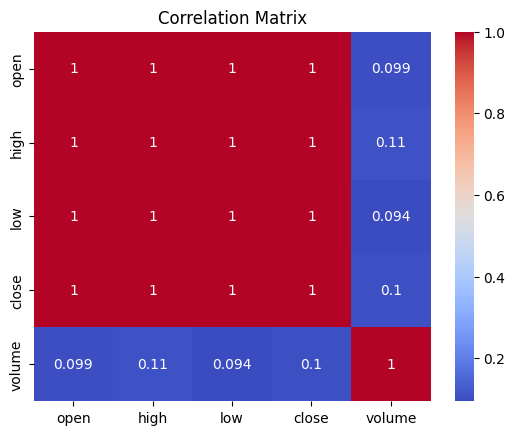

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

df = VCB[['open', 'high', 'low','close','volume']]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Các thuộc tính open, high, low, và close có mối tương quan rất cao với nhau (hệ số tương quan bằng 1). Điều này cho thấy giá mở cửa, giá cao nhất, giá thấp nhất và giá đóng cửa thường thay đổi đồng thời và có xu hướng tương tự nhau trong suốt phiên giao dịch.
- volume có mối tương quan thấp hơn với các thuộc tính liên quan tới giá. Khối lượng giao dịch là một yếu tố bổ sung quan trọng, nhưng không phải là yếu tố quyết định hoàn toàn giá cổ phiếu. Nó cung cấp thông tin về mức độ quan tâm của thị trường đối với cổ phiếu tại thời điểm cụ thể.

# **Dùng mô hình  dự đoán**

## **I. Linear Regression**

### *Import và xây dựng mô hình Linear Regression*

In [57]:
import numpy as np

def mean_squared_error_custom(y_true, y_pred):
    """
    Tính Mean Squared Error (MSE) dựa trên các giá trị thực tế và dự đoán.
    
    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MSE.
    """
    return np.mean((y_true - y_pred)**2)

def r2_score_custom(y_true, y_pred):
    """
    Tính R-squared Score dựa trên các giá trị thực tế và dự đoán.
    
    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị R-squared Score.
    """
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

def mean_absolute_error_custom(y_true, y_pred):
    """
    Tính Mean Absolute Error (MAE) dựa trên các giá trị thực tế và dự đoán.
    
    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MAE.
    """
    return np.mean(np.abs(y_true - y_pred))


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Đọc dữ liệu

In [59]:

df = VCB.copy()
# copy dataframe để thực hiện phần khác mà không làm thay đổi dữ liệu gốc
df1 = df.copy()
df['time'] = pd.to_datetime(df['time'])
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Tạo và huấn luyện mô hình Linear Regression

In [60]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [61]:
coefficients = model_lr.coef_
intercept = model_lr.intercept_

print("Hệ số Góc (Slopes):", coefficients)
print("Hệ số Chặn (Intercept):", intercept)


Hệ số Góc (Slopes): [-4.54055628e-01  7.93476461e-01  6.60230284e-01 -1.29107233e-05]
Hệ số Chặn (Intercept): -30.245518910858664


In [62]:
# Dự đoán giá với tập kiểm tra
y_pred = model_lr.predict(X_test)

# Đánh giá mô hình
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print(f'Mean Squared Error: {mse_lr}')
print(f'R^2 Score: {r2_lr}')
print("Mean Absolute Error (MAE):", mae_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Mean Squared Error: 203776.62030258722
R^2 Score: 0.9996587459265965
Mean Absolute Error (MAE): 311.80289379090516
Root Mean Squared Error (RMSE): 451.41623841260656


Trực quan dữ liệu thực tế với dữ liệu dự đoán bằng dataframe

In [63]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfr

,Actual,Predicted
53,11420,11354.987135
2391,85200,85402.925728
2310,89000,89360.949070
728,22340,22210.089501
850,25240,25175.733748
...,...,...
1810,65290,64726.167923
2330,89100,89191.677030
684,24110,24127.965563
1674,67220,67229.097291


Trực quan hóa bằng matplotlib

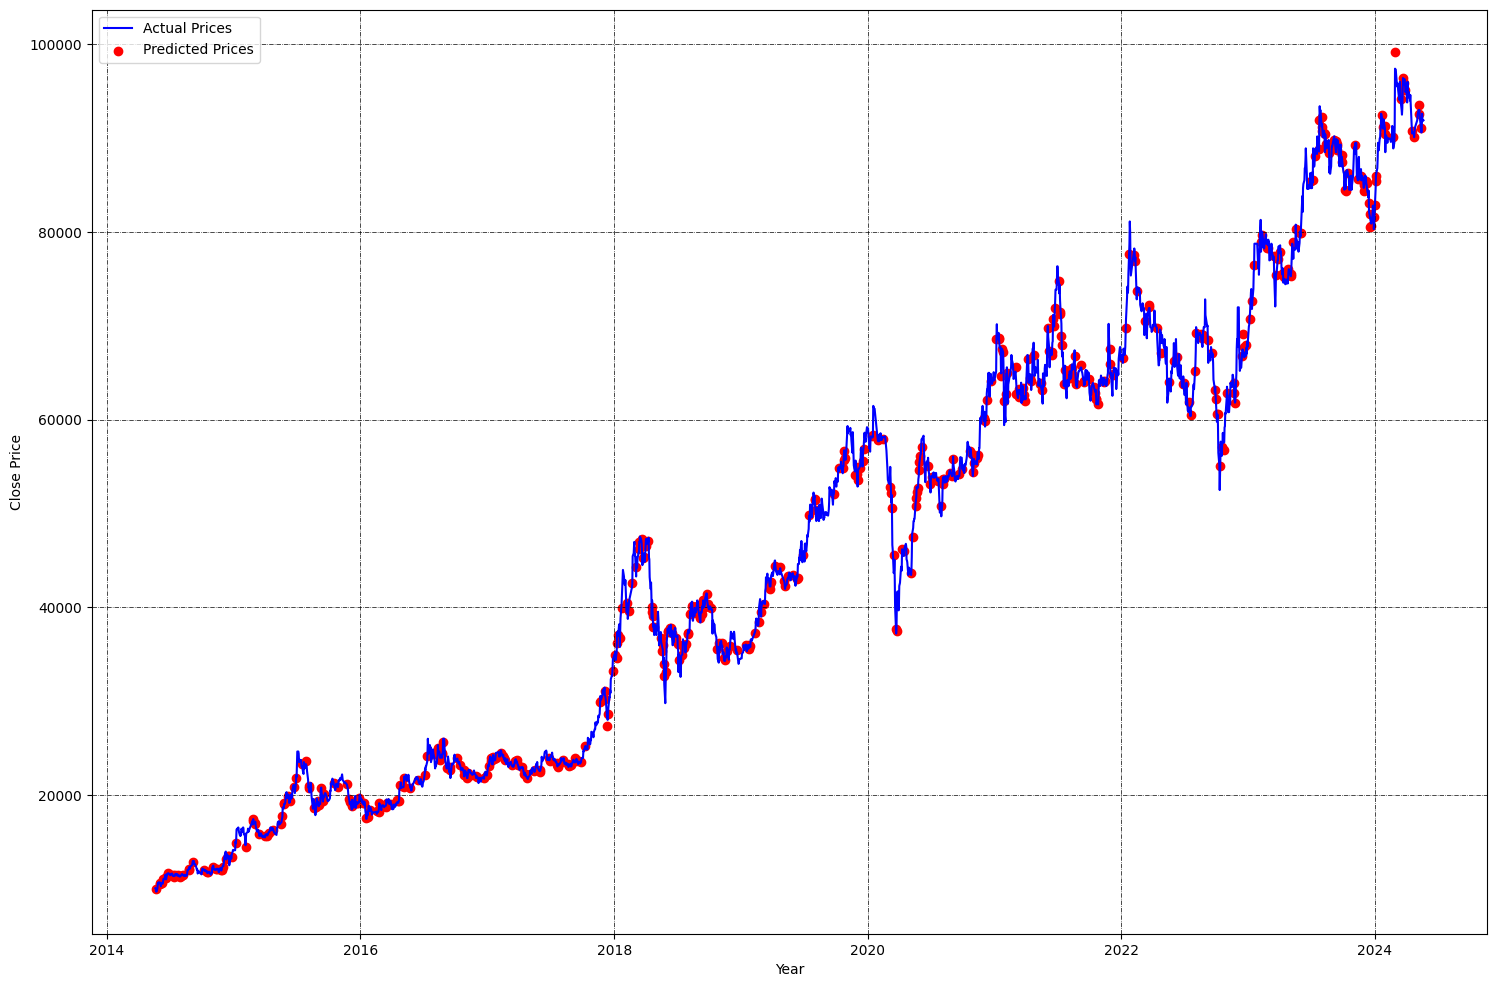

In [64]:
# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.figure(figsize=(18, 12))
plt.plot(df['time'], df['close'], label='Actual Prices', color='blue')
plt.scatter(df['time'].iloc[X_test.index], y_pred,
            color='red', label='Predicted Prices')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Tạo các cột 5 ngày tiếp theo kể từ dữ liệu cuối

In [65]:
for i in range(1,6):
    df[f'next_{i}_day'] = df['time'] + pd.Timedelta(days=i)

Dự đoán giá close cho 5 ngày tiếp theo kể từ dữ liệu cuối

In [66]:
# Tạo các giá trị mới cho 5 ngày tiếp theo
last_known_values = df1.iloc[-1][['open', 'high', 'low', 'volume', 'close']].values

# Tạo DataFrame để chứa các giá trị dự đoán
future_predictions = []

for i in range(5):
    # Tạo bộ dữ liệu mới dựa trên các giá trị đã biết gần nhất
    new_features = last_known_values[-6:-1]  # Sử dụng các đặc trưng `open`, `high`, `low`, `volume`
    new_features_df = pd.DataFrame([new_features], columns=features)
    
    # Dự đoán giá đóng cửa cho ngày mới
    predicted_price = model_lr.predict(new_features_df)[0]
    
    # Thêm giá trị dự đoán vào danh sách kết quả
    future_predictions.append(predicted_price)
    
    # Cập nhật các giá trị đã biết để dự đoán cho ngày tiếp theo
    last_known_values = np.append(last_known_values[1:], predicted_price)

print("Dự đoán giá đóng cửa cho 5 ngày tiếp theo:")
for i in range(1, 6):
    df[f'next_{i}_day'] = df['time'] + pd.Timedelta(days=i)
    df[f'next_{i}_day'] = pd.to_datetime(df[f'next_{i}_day'])
five_days_tail = []
five_pred_tail = []

# Kết hợp in ra các giá trị dự đoán với ngày tương ứng
for i, price in enumerate(future_predictions):
    next_day = df[f'next_{i+1}_day'].tail(1).dt.strftime('%Y-%m-%d').tolist()
    next_day_str = str(next_day[0])
    five_days_tail.append(next_day_str)
    # five_days_tail = df['time'].tail(1).dt.strftime('%Y-%m-%d').tolist()
    five_pred_tail.append(round(price,2))
    print(f"Ngày {i+1} ({next_day_str}): {price}")

Dự đoán giá đóng cửa cho 5 ngày tiếp theo:
Ngày 1 (2024-05-21): 92449.39484606918
Ngày 2 (2024-05-22): 719730.9045975058
Ngày 3 (2024-05-23): 847192.1478962665
Ngày 4 (2024-05-24): -340024.42500646657
Ngày 5 (2024-05-25): 506775.6629292332


Giá close dự đoán được 5 ngày kể từ dữ liệu cuối

In [67]:
df_five_tail = pd.DataFrame({'Time': five_days_tail, 'Predicted Price': five_pred_tail})
df_five_tail

,Time,Predicted Price
0,2024-05-21,92449.39
1,2024-05-22,719730.90
2,2024-05-23,847192.15
3,2024-05-24,-340024.43
4,2024-05-25,506775.66


10 ngày cuối của bảng dữ liệu dùng để quan sát với giá dự đoán 5 ngày tiếp theo phía trên

In [68]:
dtaa = df1[['time', 'close']]
dtaa.tail(10)

,time,close
2489,2024-05-07,92900
2490,2024-05-08,93000
2491,2024-05-09,92500
2492,2024-05-10,92000
2493,2024-05-13,91000
2494,2024-05-14,90600
2495,2024-05-15,91000
2496,2024-05-16,92600
2497,2024-05-17,91800
2498,2024-05-20,91900


## **Hoàn thành mô hình Linear Regression, tiếp đến là mô hình LSTM**

## **II.LSTM**

### *import thư viện*

In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go

In [70]:
df =VCB.copy()
df

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-05-20,9960,10100,9770,10070,280870,VCB
1,1,2014-05-21,10100,10100,9920,10030,289340,VCB
2,2,2014-05-22,10030,10070,9960,9960,463230,VCB
3,3,2014-05-23,9960,9960,9700,9700,493560,VCB
4,4,2014-05-26,9810,10070,9700,10070,319920,VCB
...,...,...,...,...,...,...,...,...
2494,2494,2024-05-14,91100,91600,90500,90600,818400,VCB
2495,2495,2024-05-15,91000,91300,90800,91000,883100,VCB
2496,2496,2024-05-16,92000,92700,91500,92600,1713900,VCB
2497,2497,2024-05-17,92600,92600,91700,91800,1084700,VCB


In [71]:
train_data = pd.DataFrame(df, columns=['time', 'close'])

# Chuyển đổi dữ liệu thành mảng  và chuẩn hóa
train_data_values = train_data['close'].values.reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(train_data_values)

# Dùng 50 ngày liên tục làm cơ sở dự đoán của ngày tiếp theo
x_train, y_train, times = [], [], []
for i in range(50, len(train_data_values)):
    x_train.append(sc_train[i-50:i, 0])
    y_train.append(sc_train[i, 0])
    times.append(train_data['time'].values[i])

# Chuyển đổi dữ liệu thành mảng numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape dữ liệu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Xây dựng mô hình LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, input_shape=(x_train.shape[1], 1), return_sequences=True))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_absolute_error', optimizer='adam')
model_lstm.fit(x_train, y_train, epochs=10, batch_size=50, verbose=2)

# Dự đoán trên tập huấn luyện
y_train_predict = model_lstm.predict(x_train)
y_train = sc.inverse_transform(y_train)
y_train_predict = sc.inverse_transform(y_train_predict)


Epoch 1/10


c:\Users\khanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



49/49 - 4s - 90ms/step - loss: 0.0821
Epoch 2/10
49/49 - 2s - 42ms/step - loss: 0.0492
Epoch 3/10
49/49 - 2s - 44ms/step - loss: 0.0488
Epoch 4/10
49/49 - 2s - 43ms/step - loss: 0.0451
Epoch 5/10
49/49 - 2s - 46ms/step - loss: 0.0452
Epoch 6/10
49/49 - 2s - 45ms/step - loss: 0.0449
Epoch 7/10
49/49 - 2s - 49ms/step - loss: 0.0420
Epoch 8/10
49/49 - 2s - 45ms/step - loss: 0.0396
Epoch 9/10
49/49 - 2s - 42ms/step - loss: 0.0409
Epoch 10/10
49/49 - 2s - 44ms/step - loss: 0.0378
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [72]:
# Đánh giá mô hình
mse_lstm = mean_squared_error(y_train, y_train_predict)
r2_lstm = r2_score(y_train, y_train_predict)
mae_lstm = mean_absolute_error(y_train, y_train_predict)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error trên tập huấn luyện:", mse_lstm)
print("R^2 Score trên tập huấn luyện:", r2_lstm)

# Vẽ biểu đồ so sánh giá thực và giá dự đoán
fig = go.Figure()

fig.add_trace(go.Scatter(x=times, y=y_train.flatten(), mode='lines', name='Giá thực', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=times, y=y_train_predict.flatten(), mode='lines', name='Giá dự đoán', line=dict(color='red')))

fig.update_layout(
    title='So sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện',
    xaxis_title='Thời gian',
    yaxis_title='Giá đóng cửa',
    legend=dict(x=0, y=1, traceorder='normal')
)

fig.show()

Mean Absolute Error (MAE): 1496.029738301987
Mean Squared Error trên tập huấn luyện: 4168595.528092592
R^2 Score trên tập huấn luyện: 0.9925733041456377


Dự đoán 5 ngày tiếp theo

In [73]:
# Dự đoán 5 ngày tiếp theo
future_days = 5
last_50_days = sc_train[-50:]  # Lấy 50 ngày cuối cùng trong tập huấn luyện
predicted_future = []

# Tạo bản sao của last_50_days để không ảnh hưởng đến dữ liệu gốc
current_input = last_50_days.copy()

for _ in range(future_days):
    # Dự đoán giá ngày tiếp theo
    current_input_reshaped = np.reshape(current_input, (1, current_input.shape[0], 1))
    next_day_prediction = model_lstm.predict(current_input_reshaped)
    
    # Chuyển đổi giá trị dự đoán về dạng gốc
    next_day_prediction_inversed = sc.inverse_transform(next_day_prediction)
    
    # Thêm giá trị dự đoán vào danh sách kết quả
    predicted_future.append(next_day_prediction_inversed[0, 0])
    
    # Thêm giá trị dự đoán vào current_input và loại bỏ giá trị đầu tiên
    current_input = np.append(current_input[1:], next_day_prediction, axis=0)

# Hiển thị giá dự đoán cho 5 ngày tiếp theo
predicted_future = np.array(predicted_future)
print("Dự đoán giá cho 5 ngày tiếp theo:", predicted_future)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Dự đoán giá cho 5 ngày tiếp theo: [89427.37  89224.48  88912.56  88533.12  88113.836]


In [74]:
from datetime import datetime, timedelta

# Chuyển đổi last_date từ chuỗi sang đối tượng datetime
last_date = datetime.strptime(times[-1], '%Y-%m-%d')

# Tạo danh sách thời gian cho 5 ngày tiếp theo
future_times = []
for i in range(1, 6):
    next_date = last_date + timedelta(days=i)
    future_times.append(next_date)


In [75]:
import plotly.graph_objects as go

# Thêm thời gian cho 5 ngày tiếp theo vào danh sách thời gian
all_times = np.append(times, future_times)

# Vẽ biểu đồ so sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện bằng Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=all_times, y=np.append(y_train.flatten(), np.nan * np.ones(5)), mode='lines', name='Giá thực', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=all_times[-5:], y=predicted_future, mode='lines', name='Giá dự đoán', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=times, y=y_train_predict.flatten(), mode='lines', name='Giá dự đoán', line=dict(color='red')))

fig.update_layout(
    title='So sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện',
    xaxis_title='Thời gian',
    yaxis_title='Giá đóng cửa',
    legend=dict(x=0, y=1, traceorder='normal')
)

fig.show()


# **So sánh 2 phương pháp máy học đã dùng để dự đoán thị trường chứng khoán**

- Độ đo đánh giá giữa 2 mô hình:

In [76]:
metrics = {
    'Model': ['Linear Regression', 'LSTM'],
    'Mean Squared Error': [mse_lr, mse_lstm],
    'R^2 Score': [r2_lr, r2_lstm],
    'Mean Absolute Error (MAE)': [mae_lr, mae_lstm]
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

               Model  Mean Squared Error  R^2 Score  Mean Absolute Error (MAE)
0  Linear Regression        2.037766e+05   0.999659                 311.802894
1               LSTM        4.168596e+06   0.992573                1496.029738
